# Ensemble de Mandelbrot

L'ensemble de Mandelbrot est défini comme étant l'ensemble des points $c$ du plan complexe pour lequel la série définie ci-dessous converge à partir de l'origine :
$$
\left\{
\begin{align*}
z_{n+1} &= z_{n}^{2} + c\\
z_0 &= 0\\
c \in \mathbb{C} &\text{, }z_n \in \mathbb{C}
\end{align*}
\right .
$$
    Notons $c = a + jb$. Pour obtenir l'image correspondant à cet ensemble, il suffit de "*quadrier*" le plan complexe de la constante $c$ et de faire quelques itérations de la suite $z_n$ pour chacun des points de ce quadriage et voir s'il y a convergence ou divergence.

### Définissons tout d'abord la fonction correspondant à la série : 
Elle sera utilsée à chaque itération pour faire le calcul de la convergence

In [17]:
def f(z, c):
    return z**2 + c

### Quadrillons le plan complexe correspondant à la constante $c$ :
En notant $c = a+jb$, on peut faire varier $a$ sur l'intervalle $[a\_min, a\_max]$ et $b$ sur $[b\_min, b\_max]$. Ces deux intervalles doivent être discrétisés, le premier avec un pas $da$ et le seconde avec un pas $db$. $da$ et $db$ dépendent de la finesse de la discrétisation. Si on souhaite avoir $N+1$ points de discrétisation sur chacun de ces intervalles, il suffit de diviser la longueur des intervalles par $N$.


In [18]:
# Intervalle pour la partie réelle
a_min = -2; a_max = 0.5
# Intervalle pour la partie imaginaire
b_min = -1; b_max = 1
# Nombre de points du quadrillage identique en partie réelle et imaginaire
N = 250
# Pas
da = (a_max - a_min) / N
db = (b_max - b_min) / N

### Préparons la structure de donnée pour l'image :
Nous utiliserons la librairie **numpy** pour définir une image de type matricielle, dite bitmap, par opposition au type vectoriel. Chaque point de cette matrice, chaque pixel, comporte un triplet d'entiers compris entre 0 et 255 (Rouge, Vert, Bleu) pour créer une couleur par synthèse additive. Chaque point de cette matrice correspond au quadrillage défini précédement. On définira ensuite une correspondance directe entre couleur et vitesse de convergence ou de divergence.

In [14]:
import numpy
image_C = numpy.zeros( (N+1, N+1, 3), dtype = numpy.uint8 )

### Définissons les conditions de divergence et faisons les calculs :
On choisit de caractériser les conditions de divergence, c.a.d. de caractériser la vitesse de divergence de la serie pour le point en cours de traitement du plan complexe associé à $c$. Pour ce faire, nous allons définir un rayon de convergence $R$. Si après quelques itérations par la série definie précédement, le module de $z_{n+1}$ dépasse $R$, on décide qu'il n'y a pas convergence. Afin de caractériser cette vitesse de divergence, il suffit de compter le nombre d'itérations nécessaires pour dépasser ce rayon. On appelle $i$ ce nombre d'itérations, et on affecte au point en cours de traitement la couleur $(i, i, i)$. Si le nombre d'itérations maximales $i\_max$ vaut 255, on obtient alors un dégradé de gris. La couleur noire correspond aux points ou la divergence est très rapide et la couleur blanche aux points ou il y a convergence. On choisira bien sûr un rayon de convergence supérieur à $1$.

In [15]:
# Rayon de convergence 
R = 2
# Nombre max d'itérations
i_max = 255

# Parcours du plan complexe quadrillé associé à c
for na in range(N+1):
    a = a_min + na*da
    
    for nb in range(N+1):
        b = b_min + nb*db
        
        # Initialisation du premier terme, du rayon courant et de l'itération courante
        z = r = i = 0
        # Itérations
        while r < R and i < i_max :
            z = f(z, a + b*1j)
            r = abs(z)
            i = i + 1
        
        # On diverge ou on a atteind la nombre max d'itérations    
        image_C[nb, na] = [i, i, i] # Dégradé de gris

### Sauvegarde et affichage de l'image obtenue

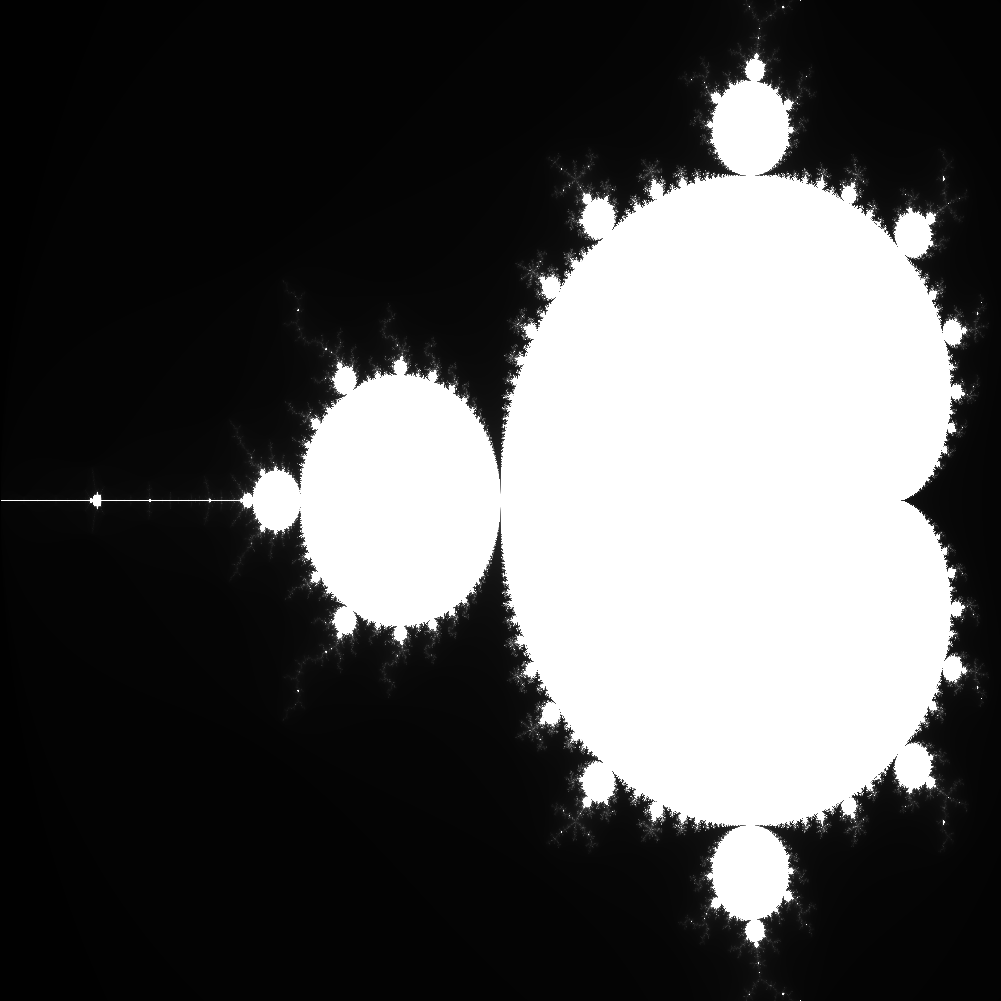

In [16]:
# Utilisation de la librairie matplotlib pour enregistrer l'image
from matplotlib import image as img
img.imsave('mandelbrotSet.png', image_C)

# Utilisation de la librairie display pour afficher l'image
from IPython.display import Image
Image(filename='mandelbrotSet.png') 